In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import yfinance as yf

In [4]:
df = yf.download('TATASTEEL.NS', start='2000-01-01', end='2016-01-01')
df.sample(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-23,37.428257,37.442551,36.880436,37.085274,28.455503,26209110
2014-12-23,38.595360,38.738270,37.413967,37.614040,29.447960,39717964
2015-12-03,22.879971,23.199137,22.560802,22.879971,18.438753,74604740
2006-10-26,43.056198,43.056198,41.995060,42.155071,26.780518,60754957
2006-06-16,35.392406,39.919098,35.392406,38.765316,24.627048,97635021


In [5]:
df1=df
df1.reset_index(inplace=True)
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4018 non-null   datetime64[ns]
 1   Open       4018 non-null   float64       
 2   High       4018 non-null   float64       
 3   Low        4018 non-null   float64       
 4   Close      4018 non-null   float64       
 5   Adj Close  4018 non-null   float64       
 6   Volume     4018 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 219.9 KB


In [7]:
df.shape

(4018, 7)

In [8]:
import plotly.express as px
fig = px.line(df1, x='Date', y='Close', title='Close Price with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

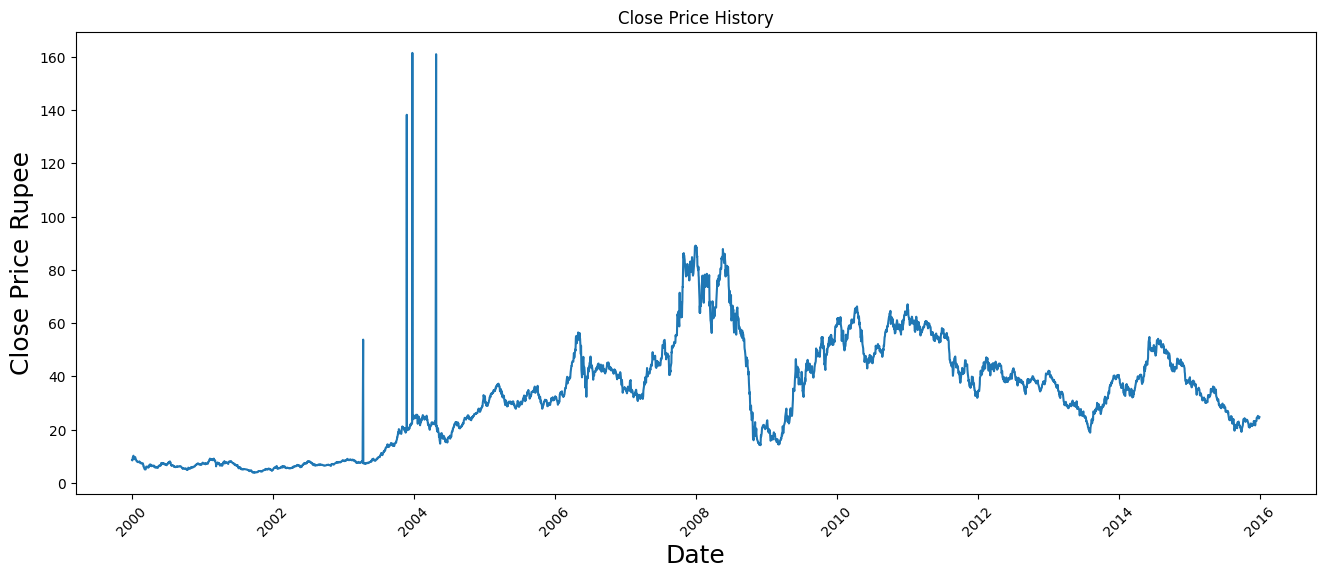

In [9]:
df.set_index('Date', inplace=True)

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupee', fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .70 ))

training_data_len

2813

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03033118],
       [0.02974378],
       [0.03179078],
       ...,
       [0.13028667],
       [0.13234062],
       [0.13300512]])

In [12]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03033118, 0.02974378, 0.03179078, 0.03595597, 0.03727317,
       0.04093996, 0.03576017, 0.03490578, 0.03273417, 0.03255617,
       0.03543977, 0.03757577, 0.03759357, 0.03412258, 0.03387337,
       0.02986838, 0.02890718, 0.02890718, 0.02885378, 0.02750098,
       0.02566758, 0.02607698, 0.02627278, 0.02589898, 0.02593458,
       0.02554298, 0.02629058, 0.02746538, 0.02655758, 0.02597018,
       0.02399438, 0.02296198, 0.02424358, 0.02442158, 0.02347818,
       0.02346038, 0.02278398, 0.02189399, 0.02194738, 0.02180498,
       0.02260598, 0.01897479, 0.01726599, 0.01710578, 0.01395519,
       0.01267359, 0.01064439, 0.0085084 , 0.01025279, 0.00877539,
       0.0082236 , 0.01080459, 0.01359919, 0.01488079, 0.01488079,
       0.01488079, 0.01468499, 0.01505879, 0.01317199, 0.01374159])]
[0.013082989027280507]

[array([0.03033118, 0.02974378, 0.03179078, 0.03595597, 0.03727317,
       0.04093996, 0.03576017, 0.03490578, 0.03273417, 0.03255617,
       0.03543977, 0.03757577, 0.0

In [13]:
print(x_train.shape)
print(y_train.shape)

(2753, 60, 1)
(2753,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# the LSTM model
# def my_model(x_train)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
2753/2753 [==============================] - 167s 58ms/step - loss: 0.0016
Epoch 2/2
2753/2753 [==============================] - 170s 62ms/step - loss: 0.0013


In [15]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

38/38 [==============================] - 4s 66ms/step


2.384922184219782

In [67]:
x_test.shape

(1205, 60, 1)

In [16]:
predictions.shape

(1205, 1)

<ipython-input-18-e6b5d41ac14c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



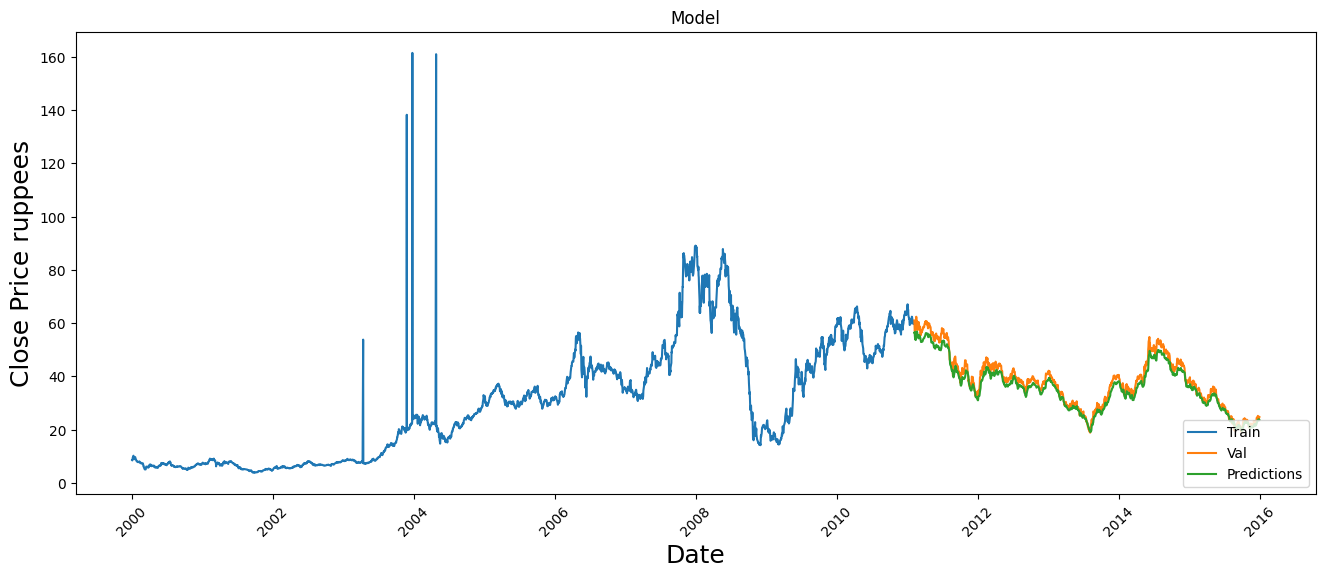

In [18]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
# df.set_index('Date', inplace=True)
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ruppees', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=45)
plt.show()

In [19]:
train.shape

(2813, 1)

In [20]:
valid.shape

(1205, 2)

In [21]:
valid

,Close,Predictions
Date,,
2011-02-07,61.013252,56.473961
2011-02-08,59.041088,56.664959
2011-02-09,57.083214,55.921310
2011-02-10,57.216599,54.655525
2011-02-11,56.716412,54.070293
...,...,...
2015-12-24,25.090319,23.737803
2015-12-28,24.209038,23.904442
2015-12-29,24.323366,23.654570


In [59]:
import pickle
pickle.dump(model,open("my_model.sav","wb"))

In [45]:
# x_test.shape

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
last_60_days_data = x_test[-60:, :]

In [47]:
last_60_days_data.shape

(60, 60, 1)

In [48]:
# sns.lineplot(data=last_60_days_data)

In [51]:
last=last_60_days_data

In [63]:
last.T

array([[[0.15620271, 0.14711094, 0.14551007, ..., 0.1024677 ,
         0.09772547, 0.10449144],
        [0.14711094, 0.14551007, 0.14575171, ..., 0.09772547,
         0.10449144, 0.10428   ],
        [0.14551007, 0.14575171, 0.14789629, ..., 0.10449144,
         0.10428   , 0.11198233],
        ...,
        [0.1024677 , 0.09772547, 0.10449144, ..., 0.13581421,
         0.1351497 , 0.12956174],
        [0.09772547, 0.10449144, 0.10428   , ..., 0.1351497 ,
         0.12956174, 0.13028667],
        [0.10449144, 0.10428   , 0.11198233, ..., 0.12956174,
         0.13028667, 0.13234062]]])

In [69]:
last_60=model.predict(last)

2/2 [==============================] - 0s 98ms/step


In [72]:
last_601=scaler.inverse_transform(last_60)
last_601.reshape(-1)

array([19.602196, 19.716331, 20.203526, 20.590986, 21.09885 , 21.533396,
       22.13203 , 22.487972, 22.45637 , 22.533281, 22.869953, 23.028929,
       22.93462 , 22.590052, 22.514551, 22.582443, 22.767443, 22.743338,
       22.73633 , 22.752535, 22.730812, 22.440104, 22.13377 , 21.961239,
       21.530474, 21.069704, 20.88085 , 20.657154, 20.672274, 20.9767  ,
       21.302116, 21.153397, 21.101528, 21.143164, 20.989183, 20.876476,
       20.951578, 21.137505, 21.167898, 21.459427, 21.87997 , 21.992695,
       22.015598, 22.147543, 21.93655 , 21.50336 , 21.47063 , 21.799795,
       22.165903, 22.329298, 22.393982, 22.863289, 23.133043, 23.353907,
       23.441162, 23.737803, 23.904442, 23.65457 , 23.51973 , 23.604156],
      dtype=float32)

In [76]:
last_1=data.iloc[-60:,:]
last_1=last_1.values

In [98]:
error=np.sqrt(np.mean((last_1-last_601)**2))
print("root mean squared error is ",error)

root mean squared error is  1.1285687259042856


# root mean squared error is  1.12

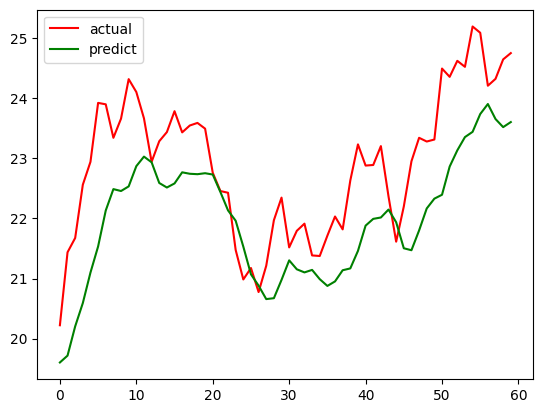

In [91]:
plt.plot(last_1,color='red')
plt.plot(last_601,color='green')
plt.legend(['actual', 'predict'])